# 🧠 REDES NEURONALES
## 🧪 Facultad de Ciencias
## 🏫 Universidad Nacional Autónoma de México

<hr>

### 📄 Tarea No. 01

#### Realizado por:
#### Iván Alejadro Ramos Herrera
#### 💜 [@arhcoder](https://github.com/arhcoder)



# [01]
Dado el siguiente cuadro con las predicciones hechas por una maquina de aprendizaje para predecir colores y los valores esperados de la supervision:

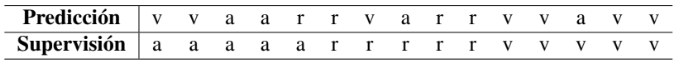

Obtener la matriz de confusion, los valores de precisión, recall (sensitibity), F1, así como el accuracy, y macro y weighted average por clase.

## Matriz de confusión

| Clase              | Real "a" | Real "r" | Real "v" |
|--------------------|----------|----------|----------|
| **Predicción "a"** | 2        | 1        | 1        |
| **Predicción "r"** | 1        | 3        | 0        |
| **Predicción "v"** | 2        | 1        | 4        |

## Medidas

| Clase | Predicciones | Datos Reales |
|-------|--------------|--------------|
| **"a"** | 4          | 5            |
| **"r"** | 4          | 5            |
| **"v"** | 7          | 5            |

## Falsos/Verdaderos - Positivos/Negativos

| Predicción | TP | TN | FP | FN |
|------------|----|----|----|----|
| **"a"**    | 2  | 8  | 2  | 3  |
| **"r"**    | 3  | 9  | 1  | 2  |
| **"v"**    | 4  | 7  | 3  | 1  |

## Métricas de evaluación

| Clase     | Precisión | Recall | F1-Score | Accuracy |
|-----------|-----------|--------|----------|----------|
| **"a"**   | 2/4       | 2/5    | 4/9      | 10/15    |
| **"r"**   | 3/4       | 3/5    | 2/3      | 12/15    |
| **"v"**   | 4/7       | 4/5    | 2/3      | 11/15    |
|**Decimales** |        |        |          |          |
| **"a"**   | 50%       | 40%    | 44.44%   | 66.66%   |
| **"r"**   | 75%       | 60%    | 66.66%   | 80%      |
| **"v"**   | 57.14%    | 80%    | 66.66%   | 73.33%   |

- *Macro-Average:* 60.71%
- *Weighted Average:* 60%

## Código de verificación

In [61]:
# Verificación en código:
import numpy as np

# Datos de la máquina:
predictions = ["v", "v", "a", "a", "r", "r", "v", "a", "r", "r", "v", "v", "a", "v", "v"]
reals = ["a", "a", "a", "a", "a", "r", "r", "r", "r", "r", "v", "v", "v", "v", "v"]
classes = ["a", "r", "v"]

# Diccionarios para contar los TP, TN, FP, FN:
tp_dict = {iclass: 0 for iclass in classes}
tn_dict = {iclass: 0 for iclass in classes}
fp_dict = {iclass: 0 for iclass in classes}
fn_dict = {iclass: 0 for iclass in classes}

# Contando los TP, TN, FP, FN:
for iclass in classes:
    for prediction, real in zip(predictions, reals):
        if prediction == iclass and real == iclass:
            tp_dict[iclass] += 1
        elif prediction != iclass and real != iclass:
            tn_dict[iclass] += 1
        elif prediction == iclass and real != iclass:
            fp_dict[iclass] += 1
        elif prediction != iclass and real == iclass:
            fn_dict[iclass] += 1

# Resultados:
for iclass in classes:
    print(f"Clase \"{iclass}\":")
    print(f"TP: {tp_dict[iclass]}, TN: {tn_dict[iclass]}, FP: {fp_dict[iclass]}, FN: {fn_dict[iclass]}\n")

Clase "a":
TP: 2, TN: 8, FP: 2, FN: 3

Clase "r":
TP: 3, TN: 9, FP: 1, FN: 2

Clase "v":
TP: 4, TN: 7, FP: 3, FN: 1



# [02]
A partir de los siguientes clústers, calcular sus purezas.

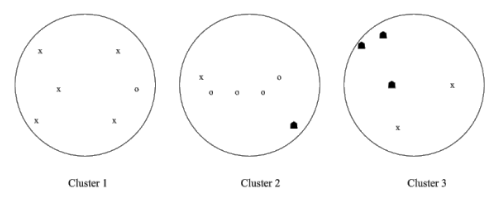


## Conteos

*Número de elementos en cada clúster*:
* n1 = 6
* n2 = 6
* n3 = 5

*Clase mayoritaria en cada clúster*:
* C1["x"] = 5
* C2["o"] = 4
* C3["☗"] = 3

## Purezas
*División del mayoritario y cantidad*:
* Para C1: 5/6: <u>83.33%</u>
* Para C2: 4/6 = <u>66.66%</u>
* Para C3: 3/5 = <u>60%</u>

# [03]
A partir de los siguientes datos de entrenamiento:

- X_train = [0, 1, 1.5, 3, 3, 3.5, 5]
- y_train = [0, 2, 2, 3, 2.5, 4.5, 6]

Estimar la recta de regresion que minimice el error cuadrático medio usando el algoritmo de Least-Squares (notese que b = 0). Evaluar el modelo usando MSE obtenido en los siguientes datos:
- X_test = [2.5, 4, 6]
- y_test = [3.5, 4.8, 8]

## Graficando la distribución

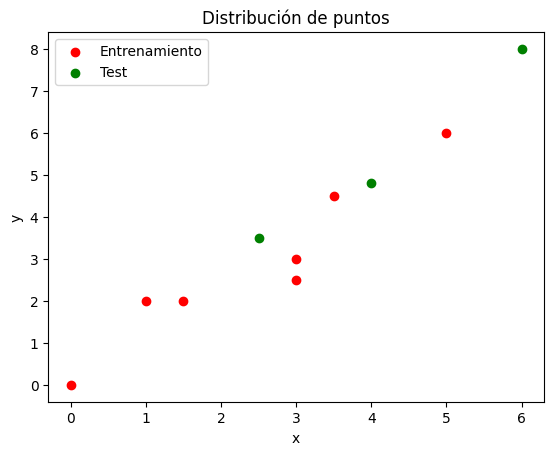

In [62]:
# Librerías mecesarias:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrenamiento:
X_train = np.array([0, 1, 1.5, 3, 3, 3.5, 5]).reshape(-1, 1)
y_train = np.array([0, 2, 2, 3, 2.5, 4.5, 6])

# Datos de test:
X_test = np.array([2.5, 4, 6]).reshape(-1, 1)
y_test = np.array([3.5, 4.8, 8])

plt.scatter(X_train, y_train, c="red", label="Entrenamiento")
plt.scatter(X_test, y_test, c="green", label="Test")
plt.title("Distribución de puntos")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Regresión Lineal Simple

Estimación los parámetros por Mínimos Cuadrados:

$\boldsymbol{\theta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}$

In [63]:
# Para Regresión Lineal Simple, el valor de "theta" (W), es sólo uno:
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print("Valores de θ:", theta)

Valores de θ: [1.14957265]


Función de costo: Error Cuadrático Medio:

$E(\boldsymbol{\theta}) = \frac{1}{n}\sum_{i=1}^n (f_{\boldsymbol{\theta}}(\mathbf{x}'^{(i)}) - y^{(i)})^2$

In [64]:
# Retorna el Error Cuadrático Medio con base en predicciones y datos reales:
sse = lambda y_real, y_predicted: ((y_real - y_predicted)**2).mean()

Realizamos predicciones en conjunto de prueba:

In [65]:
# Hace predicciones con el set de test y la "theta" calculada:
predictions = X_test @ theta
print(predictions)

[2.87393162 4.5982906  6.8974359 ]


In [66]:
# Compara las predicciones y los valores reales:
print("Predictions:", predictions)
print("Real values:", y_test)

Predictions: [2.87393162 4.5982906  6.8974359 ]
Real values: [3.5 4.8 8. ]


Calcula el error cuadrático medio entre los valores reales y los valores predichos:

In [67]:
ECM = sse(y_test, predictions)
print("Error:", ECM)

Error: 0.5494319648379483


## Gráfica de Regresión

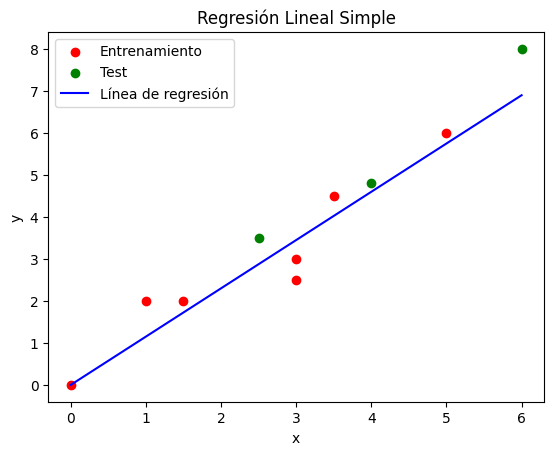

In [68]:
# Gráfica de los puntos y la regresión:
plt.scatter(X_train, y_train, c="red", label="Entrenamiento")
plt.scatter(X_test, y_test, c="green", label="Test")
xrange = np.linspace(0, 6, 100)
line = xrange.reshape(-1, 1) @ theta
plt.plot(xrange, line, label="Línea de regresión", color="blue")
plt.title("Regresión Lineal Simple")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

🛑 El **Error Cuadrático Medio es alto** muy probablemente gracias a que **el último punto de test** (verde) está alejado de la línea ajustada por los puntos de train (rojos). Si quitamos ese punto, podrémos ver que el error se reduce...

In [69]:
# Nuevo cálculo del error sin el último punto de test:
last = len(X_test) - 1
X_test_new = X_test[:last]
y_test_new = y_test[:last]

predictions_new = X_test_new @ theta
ECM = sse(y_test_new, predictions_new)
print("Error:", ECM)

Error: 0.21632414712542947


# [04]
Demostrar que la divergencia KL:

$D_{KL}(p \parallel q) = \mathbb{E}\left[ p(x) \log\left(\frac{p(x)}{q(x)}\right) \right]$

es siempre mayor a 0 y solo igual a 0 si *q(x) = p(x)* para toda x.

Recordando que *p(x)* es una distribución que queremos aproximar con *q(x)*.

## Demostración

### Caso p(x) = q(x)

$p(x) = q(x) \text{ siempre que } q(x) \neq 0$ tenemos que por la propiedad $\frac{a}{a} = 1$:

$\mathbb{E}\left[ p(x) \log\left(\frac{p(x)}{q(x)}\right) \right] = \mathbb{E}\left[ p(x) \log\left(1\right) \right]$

y por la propiedad $\log(1) = 0$, entonces:

$\mathbb{E}\left[ p(x) \cdot 0 \right]$, por ende:

$D_{KL}(p \parallel q) = \mathbb{E}\left[ p(x) \cdot 0 \right]$

$D_{KL}(p \parallel q) = \mathbb{E}\left[ 0 \right]$

$D_{KL}(p \parallel q) = 0$

<br>

Por ende, concluímos que:

$p(x) = q(x) \iff q(x) \neq 0$:

$D_{KL}(p \parallel q) = 0$


### Caso p(x) ≠ q(x)

Partiendo de otra manera de escribir la Divergencia KL:

$D_{KL}(p \parallel q) = \mathbb{E} \left[ p(x) \cdot \log\left(\frac{p(x)}{q(x)}\right) \right]$

y aprovechando la propiedad de los logaritmos:

$\log\left(\frac{a}{b}\right) = \log(a) - \log(b)$,
reescribimos como:

$D_{KL}(p \parallel q) = \mathbb{E}\left[ p(x) \cdot \left[\log(p(x)) - \log(q(x))\right]\right]$

$\mathbb{E}\left[ p(x) \cdot \left[\log(p(x)) - \log(q(x))\right] \right]$

Distribuímos:

$\mathbb{E}\left[ p(x)\log(p(x)) \right] - \mathbb{E}\left[ p(x)\log(q(x)) \right]$

Ahora representamos la Divergencia como una resta de dos términos:

🛑 Ahora, notemos que podemos expresar la Divergencia KL como la resta de dos términos (Término 1 - Término 2):

- Término 1: $\mathbb{E}\left[ p(x)\log(p(x)) \right]$

- Término 2: $\mathbb{E}\left[ p(x)\log(q(x))\right]$

Para que la divergencia sea siempre mayor que 0, debemos asegurarnos que el Término 1 sea siempre mayor al Término 2, pues se trata de una resta.

Entonces:

$D_{KL}(p \parallel q) > 0 \iff \mathbb{E}[ p(x)\log(p(x))] > \mathbb{E}[ p(x)\log(q(x))]$

cuando *p(x) es distinta de q(x)*...

<br>

**UTILIZANDO UNA PROPIEDAD DE LA DESIGUALDAD DE JENSEN QUE EXPLICA QUE...**

Si **f(x) : R → R** es una función convexa tal que las variables X y f(x) tienen esperanza, entonces:

$f(\mathbb{E}(x)) ≤ \mathbb{E}[f(x)]$

Si la función es cóncava, la desigualdad se invierte:

$\mathbb{E}[f(x)] ≤ f(\mathbb{E}[x])$

Si la función ***f(x) = log(x)***, que es una función cóncava, ya que la segunda derivada de log(x) es negativa para todos los valores positivos de x.

Por lo tanto:

$\mathbb{E}[\log(x)] ≤ \log(\mathbb{E}[x])$

Consultar en (https://webs.um.es/joseori/documentos/docencia/ce1.pdf), página 8.

<br>

**APLICANDO LA PROPIEDAD DE LA DESIGUALDAD DE JENSEN A LA DESIGUALDAD QUE TRATÁBAMOS DE PROBAR, CON LOS TÉRMINOS 1 Y 2...**

$\mathbb{E}[ p(x)\log(p(x))] > \mathbb{E}[ p(x)\log(q(x))]$

<br>

*Para el Término 1:*

$\mathbb{E}[p(x)\log(p(x))] ≥ log(\mathbb{E}[p(x)])$

<br>

*Para el Término 2:*

$\mathbb{E}[p(x)\log(q(x))] ≥ log(\mathbb{E}[p(x)])$

<br>

Se nota que ambos términos son mayores o iguales a $\log(\mathbb{E}[p(x)])$

por ende, como

$ a - a = 0$;

$\log(\mathbb{E}[p(x)]) - \log(\mathbb{E}[p(x)]) = 0$;

Regresamos a la fórmula de Divergencia:

$D_{KL}(p \parallel q) = \mathbb{E}[ p(x)\log(p(x))] - \mathbb{E}[ p(x)\log(q(x))] ≥ \log(\mathbb{E}[p(x)]) - \log(\mathbb{E}[p(x)])$

Es decir...

$D_{KL}(p \parallel q) = \mathbb{E}[ p(x)\log(p(x))] - \mathbb{E}[ p(x)\log(q(x))] ≥ 0$

### Concluímos

$D_{KL}(p \parallel q) > 0 \iff p(x) \neq q(x)$

$D_{KL}(p \parallel q) = 0 \iff p(x) = q(x)$

# [05]
Demostrar que la solucion al problema de la regresión lineal está dada por los parametros:

$(w,b) = (X^{T} X)^{-1} X^{T}Y$

## Demostración

Para la demostración, partimos del hecho de que la Solución a la Regresión está contemplada como problema de optimización, en donde se buscan una serie de parámetros $\theta$ que determinen la forma de una Función Lineal (Línea, Plano, Hiérplano, etc) que se ajuste a una serie de puntos $X$ llamados **Datos de supervisión**, que tienen como resultado $Y$, de manera que se busca minimizar la distancia de la Función Lineal estimada con respecto a los puntos, utilizando la función de coste $EMC$ (Error Cuadrático Medio), de la forma:

$EMC$:

$R(\theta) = \frac{1}{2} \sum_{(x,y)}|| y - (wx + b)||^2_2$

Considerando que $\theta$ es un vector extendido que contiene $w$, además de una columna extra con los valores de $b$, por lo que...

$\theta = (w, b)$

Y donde:

- Σ representa la suma sobre todos los puntos de datos en tu conjunto de entrenamiento.
- (w, b) son los parámetros que deseamos encontrar.
- (x, y) son los puntos de datos individuales en el conjunto de supervisión.
- n es el número de observaciones de supervisión.
- x es la variable independiente.
- y es la variable dependiente.
- w es el coeficiente de la pendiente.
- b es la ordenada al origen.

En donde se puede reescribir de manera matricial como:

Primero, podemos reescribir la función ECM en forma matricial:

$ECM = \frac{1}{n}||Y - (XW + b)||^2$

Donde:

- Y es un vector columna con todas las observaciones yi.
- X es una matriz con todas las observaciones xi como columnas.
- W es un vector columna que contiene los coeficientes w.
- b es un escalar.

<br>

**Minimización:**

Para resolver el problema de encontrar los valores de $\theta$ que minimicen la función de coste, recurrimos a la Optimización de $R(\theta)$, por ende podemos aprovechar el gradiente para encontrar el $argmin$ para $R$; derivando e igualando a 0:

$\nabla R(\theta) = 0$

$\frac{\delta}{\delta w}\frac{1}{n} ||Y - (XW + b)||^2$

Calculando las derivadas parciales con respecto a w, b:

<br>

Derivada parcial de R con respecto a w:

$\frac{\delta}{\delta w}(\frac{1}{n} || Y - (WX + b) ||^2)$

$ = \frac{1}{n} \frac{\delta}{\delta w}(|| Y - (WX + b) ||^2)$

Aplicando la Regla de la Cadena para derivar:

$ = \frac{1}{n} \frac{\delta}{\delta w}(Y - (WX + b))^T \cdot (Y - (XW + b))$

$ = \frac{1}{n} \frac{\delta}{\delta w}(Y^T - (WX + b)^T) \cdot (Y - (XW + b))$

Aprovechando la propiedad $(A^T)^T = A$, y la derivada de una constante es 0:

$ = \frac{1}{n} \frac{\delta}{\delta w}(Y^T - W^T X^T - b) \cdot (Y - (XW + b))$

$ = \frac{1}{n} \frac{\delta}{\delta w}(Y^T - W^T X^T - b) \cdot (Y - XW - b)$

Simplificando al derivar:

$ = \frac{1}{n}(X^T) \cdot (Y - XW - b)$

$ = -\frac{1}{n}X^T \cdot (Y - XW - b)$

Concluyendo la primer derivada parcial como:

$\frac{\delta R(\theta)}{\delta w} = -\frac{1}{n}X^T \cdot (Y - XW - b)$

<br>

Derivando con respecto a b:

MISMO PROCESO DE SIMPLIFICACIÓN:

$\frac{\delta}{\delta b}(\frac{1}{n} || Y - (WX + b) ||^2)$

$ = \frac{1}{n} \frac{\delta}{\delta b}(|| Y - (WX + b) ||^2)$

Aplicando la Regla de la Cadena para derivar:

$ = \frac{1}{n} \frac{\delta}{\delta b}(Y - (WX + b))^T \cdot (Y - (XW + b))$

$ = \frac{1}{n} \frac{\delta}{\delta b}(Y^T - (WX + b)^T) \cdot (Y - (XW + b))$

Aprovechando la propiedad $(A^T)^T = A$, y la derivada de una constante es 0:

$ = \frac{1}{n} \frac{\delta}{\delta b}(Y^T - W^T X^T - b) \cdot (Y - (XW + b))$

$ = \frac{1}{n} \frac{\delta}{\delta b}(Y^T - W^T X^T - b) \cdot (Y - XW - b)$

Derivando y simplificando:

$ = \frac{1}{n}(-1) \cdot (Y - XW - b)$

Concluyendo la primer derivada parcial como:

$\frac{\delta R(\theta)}{\delta b} = -\frac{1}{n} \cdot (Y - XW - b)$

<br>

Igualando las derivadas parciales a 0 para minimizar:

Para w:

$-\frac{1}{n}X^T \cdot (Y - XW - b) = 0$

Eliminamos el -n:

$X^T \cdot (Y - XW - b) = 0$

$X^T Y - X^T XW - X^T b = 0$

$X^T Y - X^T XW = X^T b$

Despejando W:

$- X^T XW = X^T b - X^T Y$

Cambiando signos:

$X^T XW = - X^T b + X^T Y$

$W = (X^T X)^{-1} \cdot (- X^T b + X^T Y)$

$W = (X^T X)^{-1} (- X^T b) + (X^T X)^{-1} ( X^T Y)$

$W = (X^T X)^{-1} (- X^T b) + (X^T X)^{-1} ( X^T Y)$

Para b:

$-\frac{1}{n} \cdot (Y - XW - b) = 0$

Eliminamos el -n y redistribuímos:

$Y - (XW + b) = 0$

$Y - b = XW$

$- b = XW - Y$

Cambiando signos:

$b = -WX + Y$

<br>

$∴$

Los valores que minimizan la Función de Coste $R(\theta)$ son:

$W = (X^T X)^{-1} X^T Y$

$b = Y - XW$

Y volviendo a:

Considerando que $\theta$ es un vector extendido que contiene $w$, además de una columna extra con los valores de $b$, por lo que...

$\theta = (w, b)$

Extrapolamos que:

<br>

$\theta = (X^T X)^{-1} X^T Y$


# [06]
Desarrollar un perceptron para el operador l lógico de implicación x → y, así como para los operadores de NAND y NOR.

## Implicación

**Tabla de inputs / outputs:**

| x | y | x => y |
|---|---|--------|
| 0 | 0 | 1      |
| 0 | 1 | 1      |
| 1 | 0 | 0      |
| 1 | 1 | 1      |

### Gráfica

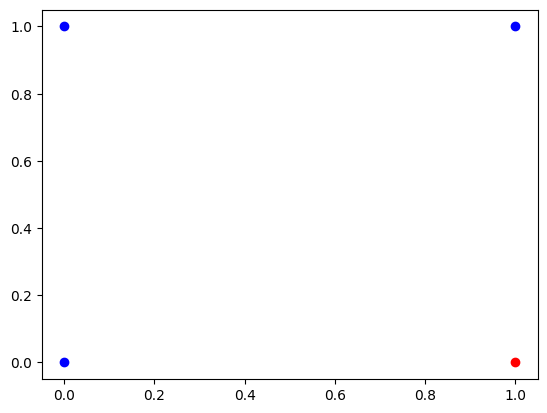

In [70]:
import matplotlib.pyplot as plt
plt.scatter([0, 0, 1], [0, 1, 1], c="blue", label="1")
plt.scatter([1], [0], c="red", label="0")
plt.show()

Sí son puntos linealmente separables, por lo que con sólo un perceptrón nos basta...

### Perceptrón

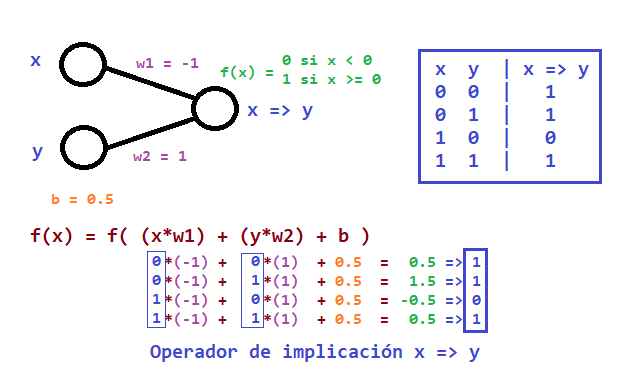

### Solución

- **Entradas**:
  - x
  - y
- **Perceptrones**:
  - f(x): x => y
- **Pesos**:
  - w1 = -1
  - w2 =  1
- **Sesgo**:
  - b = 0.5
- **Función**:
  - f(x) = 0 si x < 0
  - f(x) = 1 si x ≥ 0

## NAND

**Tabla de inputs / outputs:**

| x | y | x NAND y |
|---|---|----------|
| 0 | 0 | 1        |
| 0 | 1 | 1        |
| 1 | 0 | 1        |
| 1 | 1 | 0        |

### Gráfica

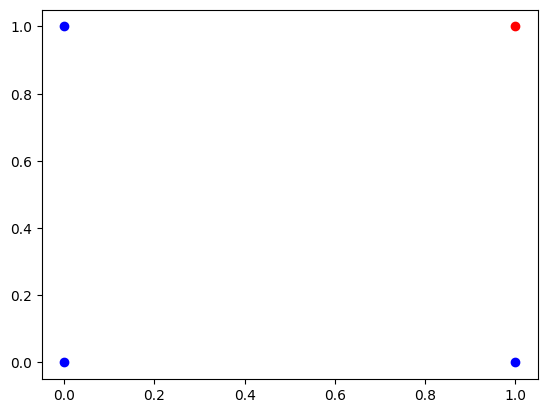

In [71]:
plt.scatter([0, 0, 1], [0, 1, 0], c="blue", label="1")
plt.scatter([1], [1], c="red", label="0")
plt.show()

Sí son puntos linealmente separables, por lo que con sólo un perceptrón nos basta...

### Perceptrón

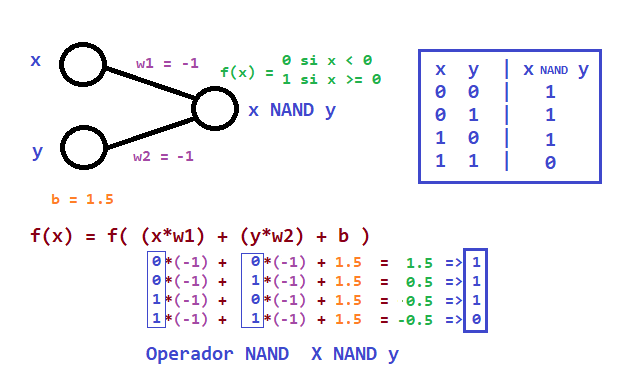

### Solución

- **Entradas**:
  - x
  - y
- **Perceptrones**:
  - f(x): x NAND y
- **Pesos**:
  - w1 = -1
  - w2 =  -1
- **Sesgo**:
  - b = 1.5
- **Función**:
  - f(x) = 0 si x < 0
  - f(x) = 1 si x ≥ 0

## NOR

**Tabla de inputs / outputs:**

| x | y | x NOR y  |
|---|---|----------|
| 0 | 0 | 1        |
| 0 | 1 | 0        |
| 1 | 0 | 0        |
| 1 | 1 | 0        |

### Gráfica

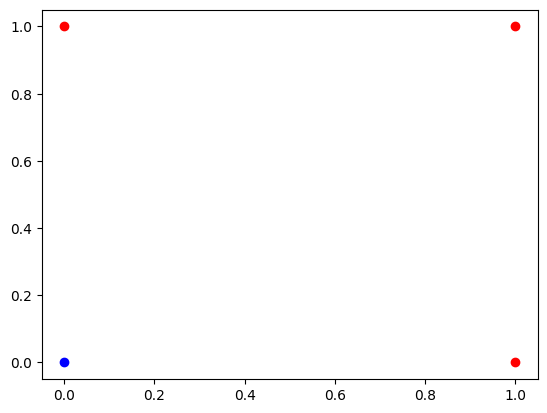

In [72]:
plt.scatter([0], [0], c="blue", label="1")
plt.scatter([0, 1, 1], [1, 0, 1], c="red", label="0")
plt.show()

Sí son puntos linealmente separables, por lo que con sólo un perceptrón nos basta...

### Perceptrón

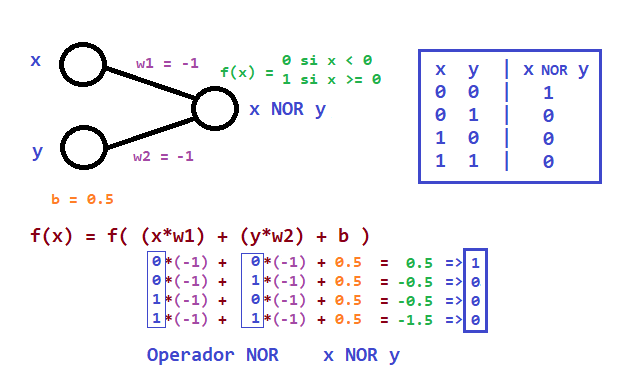

### Solución

- **Entradas**:
  - x
  - y
- **Perceptrones**:
  - f(x): x NOR y
- **Pesos**:
  - w1 = -1
  - w2 =  -1
- **Sesgo**:
  - b = 0.5
- **Función**:
  - f(x) = 0 si x < 0
  - f(x) = 1 si x ≥ 0

# [07]
A partir de los siguientes datos de entrenamiento:

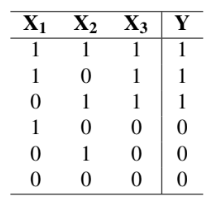

Aplicar el algoritmo del percpetron por 5 iteraciones, iniciando con los pesos $w^T$ = (1 1 1), b = 1 con rango de aprendizaje η = 1:

¿Cuál es el valor final de los pesos?

## Algoritmo

In [73]:
import numpy as np

# Datos para el algoritmo:
X = np.array([[1, 1, 1],
              [1, 0, 1],
              [0, 1, 1],
              [1, 0, 0],
              [0, 1, 0],
              [0, 0, 0]])
y = np.array([1, 1, 1, 0, 0, 0])

learning_rate = 1
iterations = 5

# Función de activación:
def activation(preactivation):
  return 1 if preactivation >= 0 else 0

# Función de ajuste:
def fit_perceptron(X, y, learning_rate, iterations):

  # Se inicializan los parámetros a optimizar:
  W = np.array([1, 1, 1])
  b = 1

  # Comienza las iteraciones:
  for i in range(iterations):

    print("_______________\n")
    print(f"Iteration [{i}]\nWeigths:\n{W}\nb: {b}")

    # Para el conjunto de entrenamiento:
    for j in range(len(X)):

      # Forward:
      x = X[j]
      target = y[j]
      preactivation = W @ x + b
      f = activation(preactivation)

      # Backward:
      W -= learning_rate * (f - target) * x
      b -= learning_rate * (f - target)

  return W, b

## Implementación

In [74]:
# Se corre el algoritmo con los datos especificados:
W, b = fit_perceptron(X, y, learning_rate, iterations)
print("_______________\n")
print(f"Final Results\nWeigths:\n{W}\nb: {b}")
print("_______________")

_______________

Iteration [0]
Weigths:
[1 1 1]
b: 1
_______________

Iteration [1]
Weigths:
[0 0 1]
b: -1
_______________

Iteration [2]
Weigths:
[0 0 1]
b: -1
_______________

Iteration [3]
Weigths:
[0 0 1]
b: -1
_______________

Iteration [4]
Weigths:
[0 0 1]
b: -1
_______________

Final Results
Weigths:
[0 0 1]
b: -1
_______________


## Resultados

**🛑 NOTA IMPORTANTE**

PARA LA FUNCIÓN DE ACTIVACIÓN SE UTILIZÓ:

f1(x) =

{
  - 1 si x >= 0
  - 0 si x <  0

}

TAL CUÁL SE VIÓ EN CLASE, SIN EMBARGO, NO SE CONVERGE CON DICHA FUNCIÓN, POR ELLO ES POSIBLE UTILIZAR LA VARIANTE:

f2(x) =

{
  - 1 si x >= 0
  - -1 si x <  0

}

**LOS RESULTADOS FUERON LOS SIGUIENTES:**

**Para f1:**
- Weigths: <u>[0 0 1]</u>
- b: <u>-1</u>

**Para f2:**
- Weigths: <u>[0 0 3]</u>
- b: <u>0</u>

# [08]
## Realizado por:
### Iván Alejadro Ramos Herrera
### 💜 [@arhcoder](https://github.com/arhcoder)